### **Abstract**

This notebook presents a comprehensive analysis of a heart failure clinical records dataset. The focus is on identifying key predictors for the 'DEATH_EVENT' variable using logistic regression and various data processing techniques. The study includes data cleaning, exploratory data analysis, feature importance evaluation, and model training and testing. This work aims to provide insights into the factors influencing heart failure outcomes and demonstrate a structured approach to predictive modeling in healthcare data.

### **Introduction**

The purpose of this notebook is to analyze clinical data related to heart failure, a critical health issue worldwide. By employing logistic regression and other statistical methods, the study seeks to uncover the most significant predictors of mortality due to heart failure. This research could aid medical professionals in understanding and predicting patient outcomes, thereby enhancing treatment strategies.

### **Dataset Description**

The dataset contains clinical records of patients with heart failure. Key features include age, anaemia, creatinine phosphokinase level, diabetes status, ejection fraction, high blood pressure, platelets count, serum creatinine and sodium levels, sex, smoking status, and time of follow-up. These variables are primarily numeric, and the dataset is well-structured with no missing values. The target variable is 'DEATH_EVENT', indicating mortality.

### **1. Data Types and Missing Values**

Objective: Identify and categorize the variables in the dataset as either numeric or categorical. This section also involves checking for and documenting the presence of any missing values in the dataset.
Approach: Utilize Python libraries like Pandas for data manipulation and analysis. This part includes commands for data type identification and missing value detection.
Outcome: Confirmation that the dataset contains numeric variables such as 'age', 'anaemia', 'creatinine_phosphokinase', and others. Categorical variables are not explicitly mentioned. The dataset is noted for its completeness, with no missing values detected.


### **2. Distribution Analysis**

Objective: Analyze the distribution of numeric variables in the dataset to understand their characteristics and identify any anomalies or patterns.
Approach: Implement visualization techniques, particularly histograms or density plots, to represent the distribution of variables. The example of 'age' distribution is given, and a similar approach can be replicated for other variables.
Outcome: Insight into the distribution shape of each variable, enabling a better understanding of the dataset's characteristics, like skewness, modality, and range.

### **3. Feature Importance Evaluation**
Objective: Determine which variables significantly influence the target variable 'DEATH_EVENT'.
Approach: Employ Random Forest, a machine learning algorithm, for feature importance analysis. This method helps in understanding which variables have the most predictive power.
Outcome: Identification of key variables such as 'time', 'serum_creatinine', 'ejection_fraction', 'age', and 'platelets' as significant predictors for the target variable.

### **4. Training and Test Sets Comparison**

Objective: Ensure that the training and test sets are representative and comparable.
Approach: Compare the mean values of the variables in both the training and test sets. This comparison is crucial to validate that the model is trained and tested on similar data distributions.
Outcome: Observations on whether the sets are statistically similar or if there are notable differences, guiding further data processing if needed.

### **5. Correlation Analysis**

Objective: Examine the relationships and dependencies between different variables in the dataset.
Approach: Use a correlation matrix to visualize the correlations between variables. This helps in identifying potential multicollinearity issues and understanding how variables relate to each other.
Outcome: Insights into which variables are moderately correlated, aiding in understanding the interdependencies that might affect the model's performance.

### **6. Logistic Regression Implementation**

Objective: Apply logistic regression to find the best features for predicting the 'DEATH_EVENT'.
Approach: Implement logistic regression, a statistical model suited for binary classification tasks. The focus is on evaluating the significance of different features in predicting the target variable.
Outcome: Identification of statistically significant predictive features, as indicated by measures like the R² value and p-values.


### **7. Accuracy Comparison**

Objective: Evaluate the impact of outliers on the model's accuracy.
Approach: Compare the model's performance metrics, likely accuracy or similar, with and without the presence of outliers in the data.
Outcome: A determination of how outliers affect the model's predictive power, guiding decisions on outlier treatment for optimal model performance.


#Importing all the neccesarry libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
import requests
import pandas as pd

# Replace this URL with the actual raw file URL from GitHub
url = 'https://raw.githubusercontent.com/Jayparekh02/JayParekh_DS_002642830/main/heart_failure_clinical_records_dataset.csv'

response = requests.get(url)
if response.status_code == 200:
    with open('heart_failure_clinical_records_dataset.csv', 'wb') as file:
        file.write(response.content)

    # Now read the CSV file
    df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

    # Display the first few rows of the dataframe
    print (df.head())
else:
    print("Failed to download the file. Status code:", response.status_code)
df.tail()

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [ ]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


## Checking for Null Value in the dataset

In [ ]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Distribution of target variable 'Death_Event'

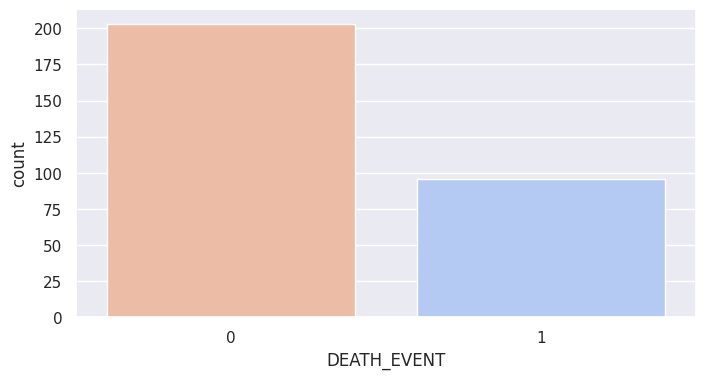

0    203
1     96
Name: DEATH_EVENT, dtype: int64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
sns.set(style="darkgrid")  # Set the plot style (optional)

# Use seaborn's countplot to visualize the distribution of 'DEATH_EVENT'
sns.countplot(x='DEATH_EVENT', data=df, palette='coolwarm_r')

# Display the counts of each category in the 'DEATH_EVENT' column
plt.show()  # This line is necessary to actually display the plot

# Print the count of occurrences for each unique value in the 'DEATH_EVENT' column
print(df['DEATH_EVENT'].value_counts())


In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


### **Analyses of Numerical and categorical features**

In [ ]:
col = list(df.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : anaemia diabetes high_blood_pressure sex smoking DEATH_EVENT
Numerical Features : age creatinine_phosphokinase ejection_fraction platelets serum_creatinine serum_sodium time


### Using Histogram to plot the distributions

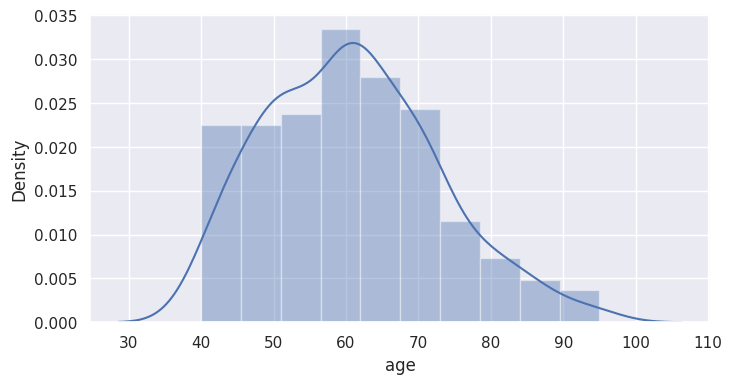

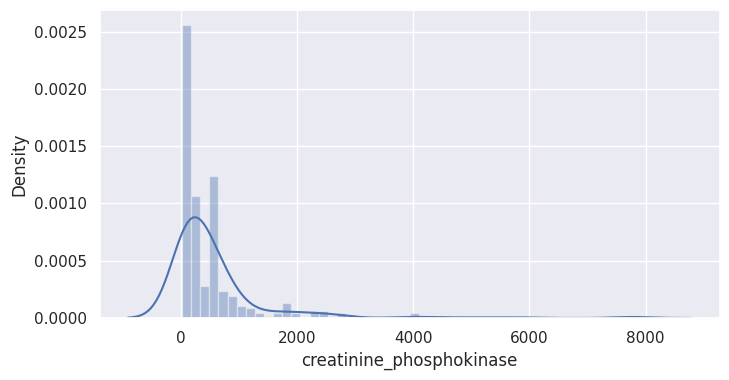

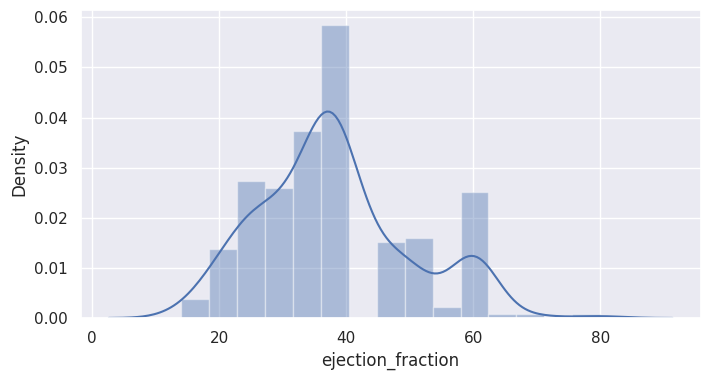

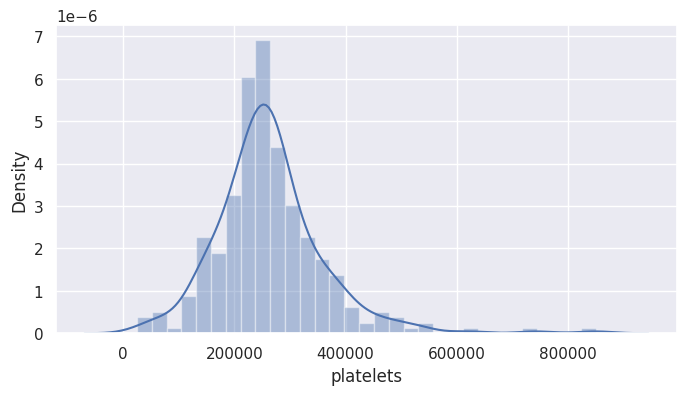

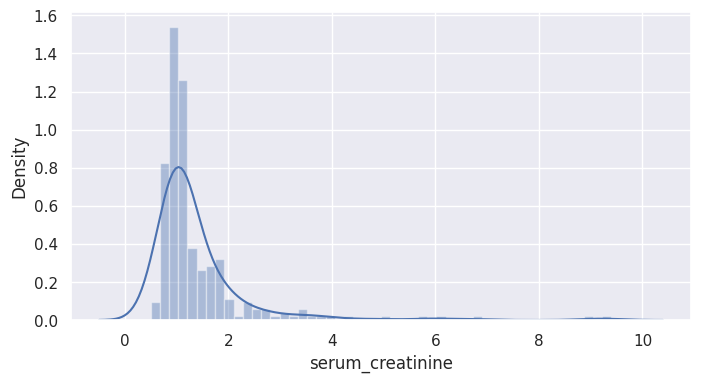

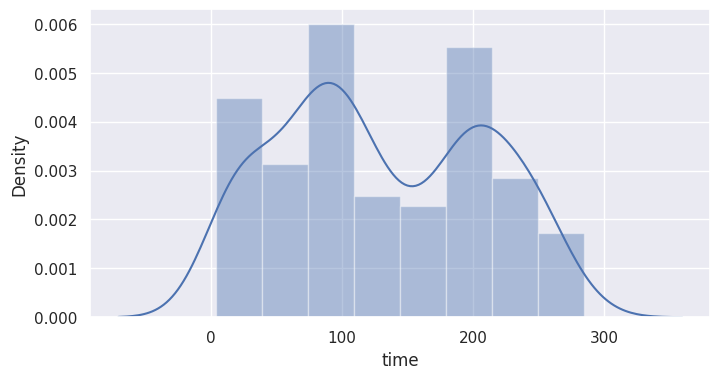

In [ ]:
#Checking the distribution of Independent variables
field_names = df[[
    'age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','time',
]]

for column in field_names.columns:
    sns.set(rc={"figure.figsize": (8, 4)});
    sns.distplot(df[column])
    plt.show()

## Ploting boxplots to detect outliers in the existing dataset

<Figure size 2000x1000 with 0 Axes>

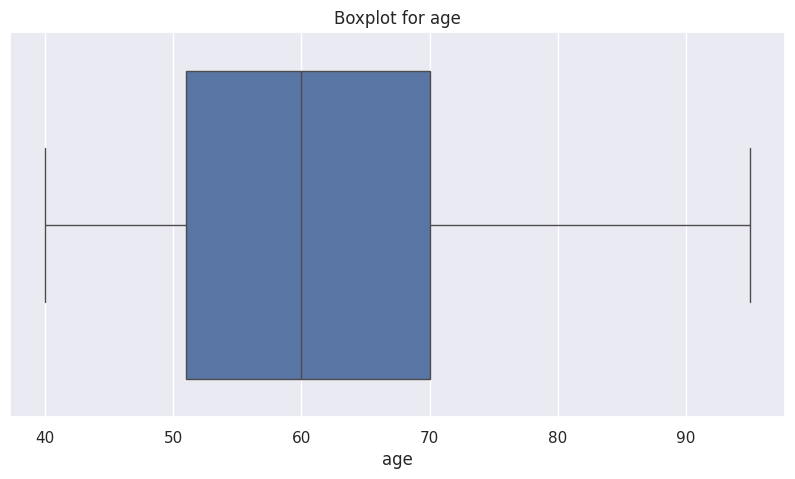

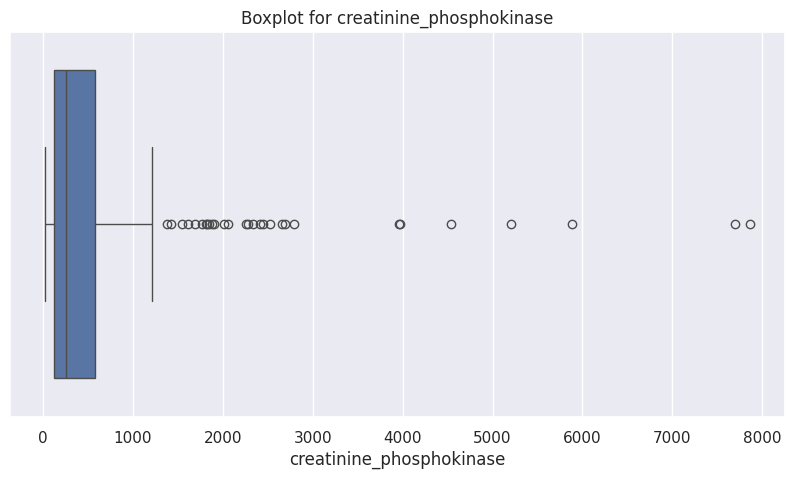

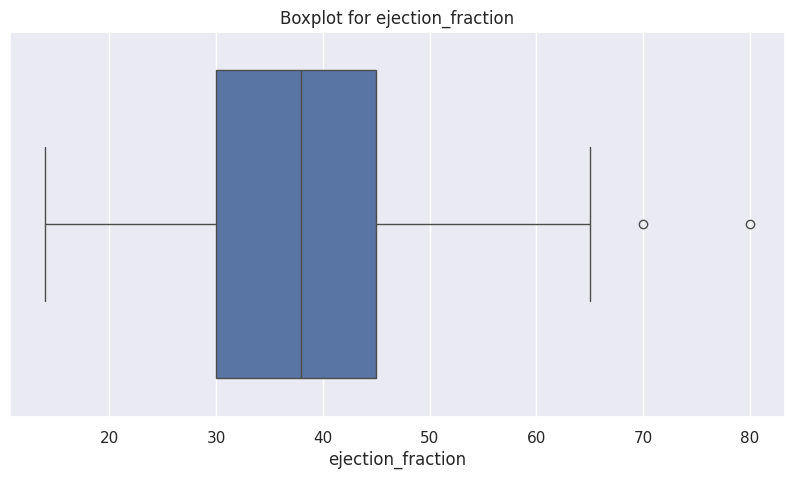

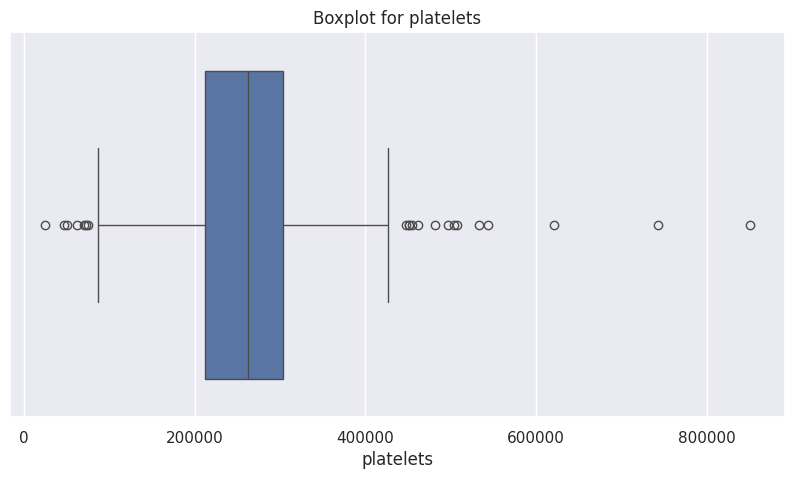

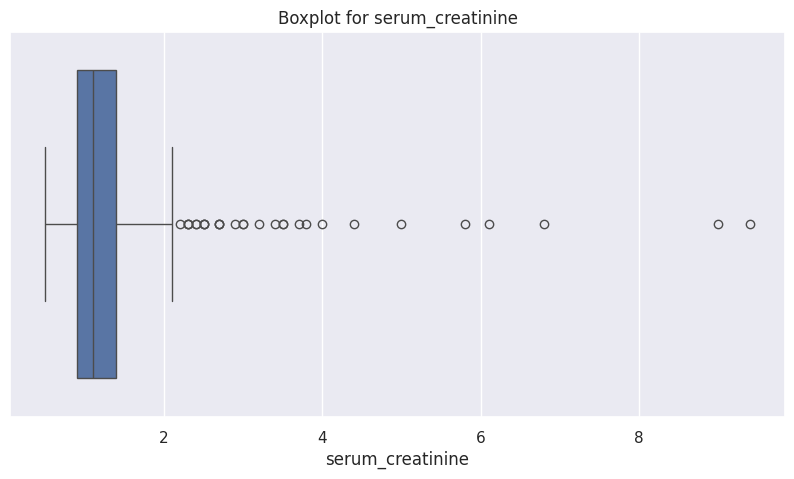

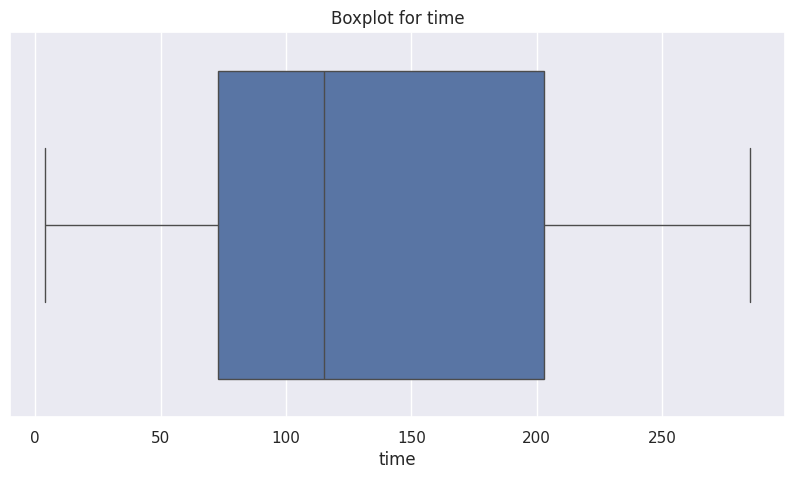

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

field_names = df[[
    'age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'time',
]]

plt.figure(figsize=(20, 10))  # Adjust the figsize as needed

# Iterate through each column in the DataFrame
for i, column in enumerate(field_names.columns):
    plt.figure(figsize=(10, 5))  # Adjust the figsize for each individual boxplot
    sns.boxplot(x=field_names[column])
    plt.title(f'Boxplot for {column}')
    plt.show()




 The outliers need to be handled so using normalization with Boxcox and plotting the boxplots after the normalization

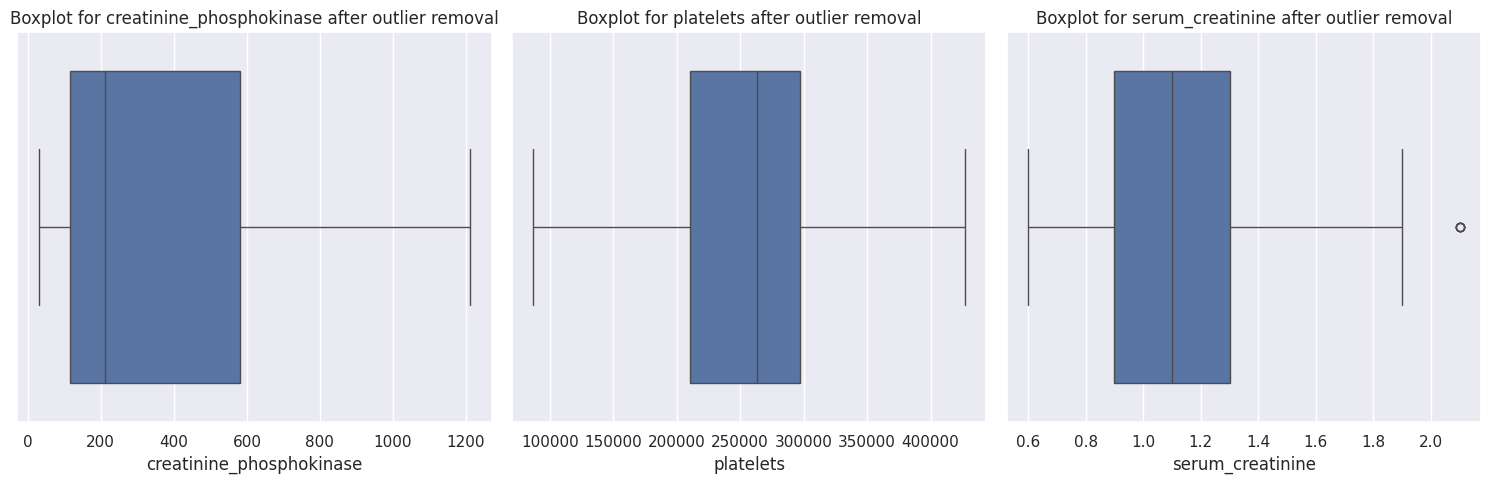

In [ ]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtering the data to remove outliers
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Replace non-positive values with a small positive number (e.g., 0.0001)
df['creatinine_phosphokinase'] = df['creatinine_phosphokinase'].replace(0, 0.0001)
df['platelets'] = df['platelets'].replace(0, 0.0001)
df['serum_creatinine'] = df['serum_creatinine'].replace(0, 0.0001)

# Apply the outlier removal function to the columns
df_with_outliers = df.copy()  # Create a copy of the DataFrame to handle outliers
for column in ['creatinine_phosphokinase', 'platelets', 'serum_creatinine']:
    df = remove_outliers_iqr(df, column)

# Applying the Box-Cox Transformation
# Note: We need to check if any columns are empty after outlier removal


# Display the boxplots for the transformed columns
if not df.empty:
    plt.figure(figsize=(15, 5))  # Adjust the size as needed

    for i, column in enumerate(['creatinine_phosphokinase', 'platelets', 'serum_creatinine']):
        plt.subplot(1, 3, i + 1)  # Adjust the layout for the number of plots
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot for {column} after outlier removal')

    plt.tight_layout()
    plt.show()
else:
    print("No data remains after removing outliers for all")

# if not df.empty:
#     df['creatinine_phosphokinase_boxcox'], _ = stats.boxcox(df['creatinine_phosphokinase'])
#     df['platelets_boxcox'], _ = stats.boxcox(df['platelets'])
#     df['serum_creatinine_boxcox'], _ = stats.boxcox(df['serum_creatinine'])

#     # Plotting the boxplots for the transformed columns
#     columns_to_plot = ['creatinine_phosphokinase_boxcox', 'platelets_boxcox', 'serum_creatinine_boxcox']

#     plt.figure(figsize=(15, 5))  # Adjust the size as needed

#     for i, column in enumerate(columns_to_plot):
#         plt.subplot(1, 3, i + 1)  # Adjust the layout for the number of plots
#         sns.boxplot(x=df[column])
#         plt.title(f'Boxplot for {column}')

#     plt.tight_layout()
#     plt.show()
# else:
#     print("No data remains after removing outliers for all")


### Data Visualzation

In [ ]:

import plotly.express as px
fig = px.histogram(df, x="age", color="DEATH_EVENT", marginal="violin", hover_data=df.columns,
                   title ="Distribution of AGE Vs DEATH_EVENT",
                   labels={"age": "AGE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"}
                  )
fig.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

d1 = df[(df["DEATH_EVENT"]==0) & (df["sex"]==1)]
d2 = df[(df["DEATH_EVENT"]==1) & (df["sex"]==1)]
d3 = df[(df["DEATH_EVENT"]==0) & (df["sex"]==0)]
d4 = df[(df["DEATH_EVENT"]==1) & (df["sex"]==0)]

label1 = ["Male","Female"]
label2 = ['Male - Survived','Male - Died', "Female -  Survived", "Female - Died"]
values1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="GENDER"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="GENDER VS DEATH_EVENT"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="GENDER DISTRIBUTION IN THE DATASET  \
                   GENDER VS DEATH_EVENT",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='GENDER', x=0.19, y=0.5, font_size=10, showarrow=False),
                 dict(text='GENDER VS DEATH_EVENT', x=0.84, y=0.5, font_size=9, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")

fig.show()

### Correlation Matrix to find important feature

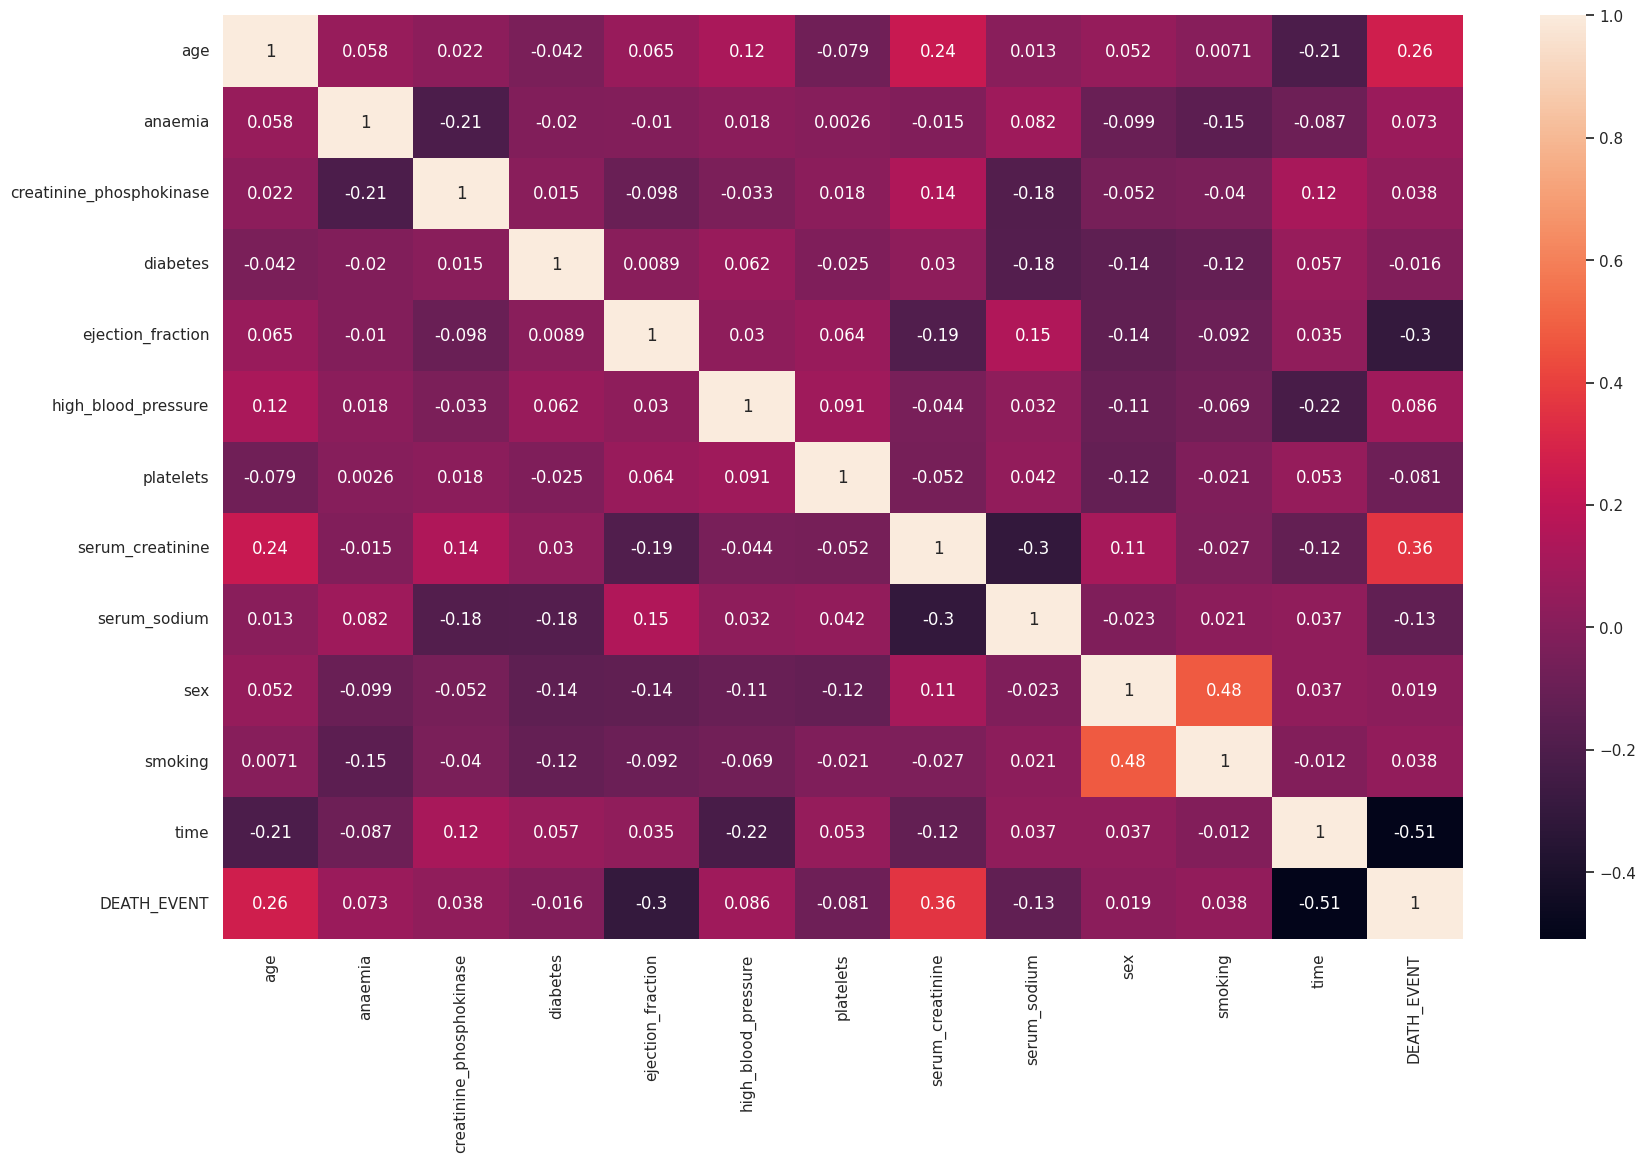

In [ ]:
corr = df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr, annot=True)
plt.show()

### The column sex and smoking are highly correlated so droping sex column

In [ ]:
columns_to_drop = [

   'sex',

]
df = df.drop(columns_to_drop, axis=1)
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.0,1.9,130,0,4,1
2,65.0,0,146,0,20,0,162000.0,1.3,129,1,7,1
3,50.0,1,111,0,20,0,210000.0,1.9,137,0,7,1
5,90.0,1,47,0,40,1,204000.0,2.1,132,1,8,1
6,75.0,1,246,0,15,0,127000.0,1.2,137,0,10,1


In [ ]:
# Dependency correlation with Death_Event column
df.corr()['DEATH_EVENT'].sort_values(ascending=False)

DEATH_EVENT                 1.000000
serum_creatinine            0.361499
age                         0.262998
high_blood_pressure         0.085738
anaemia                     0.072967
smoking                     0.038450
creatinine_phosphokinase    0.038169
diabetes                   -0.015923
platelets                  -0.081007
serum_sodium               -0.130144
ejection_fraction          -0.301111
time                       -0.510291
Name: DEATH_EVENT, dtype: float64

In [ ]:
columns_to_drop = [

   'smoking','diabetes',

]
df = df.drop(columns_to_drop, axis=1)
df.head()

,age,anaemia,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,75.0,0,582,20,1,265000.0,1.9,130,4,1
2,65.0,0,146,20,0,162000.0,1.3,129,7,1
3,50.0,1,111,20,0,210000.0,1.9,137,7,1
5,90.0,1,47,40,1,204000.0,2.1,132,8,1
6,75.0,1,246,15,0,127000.0,1.2,137,10,1


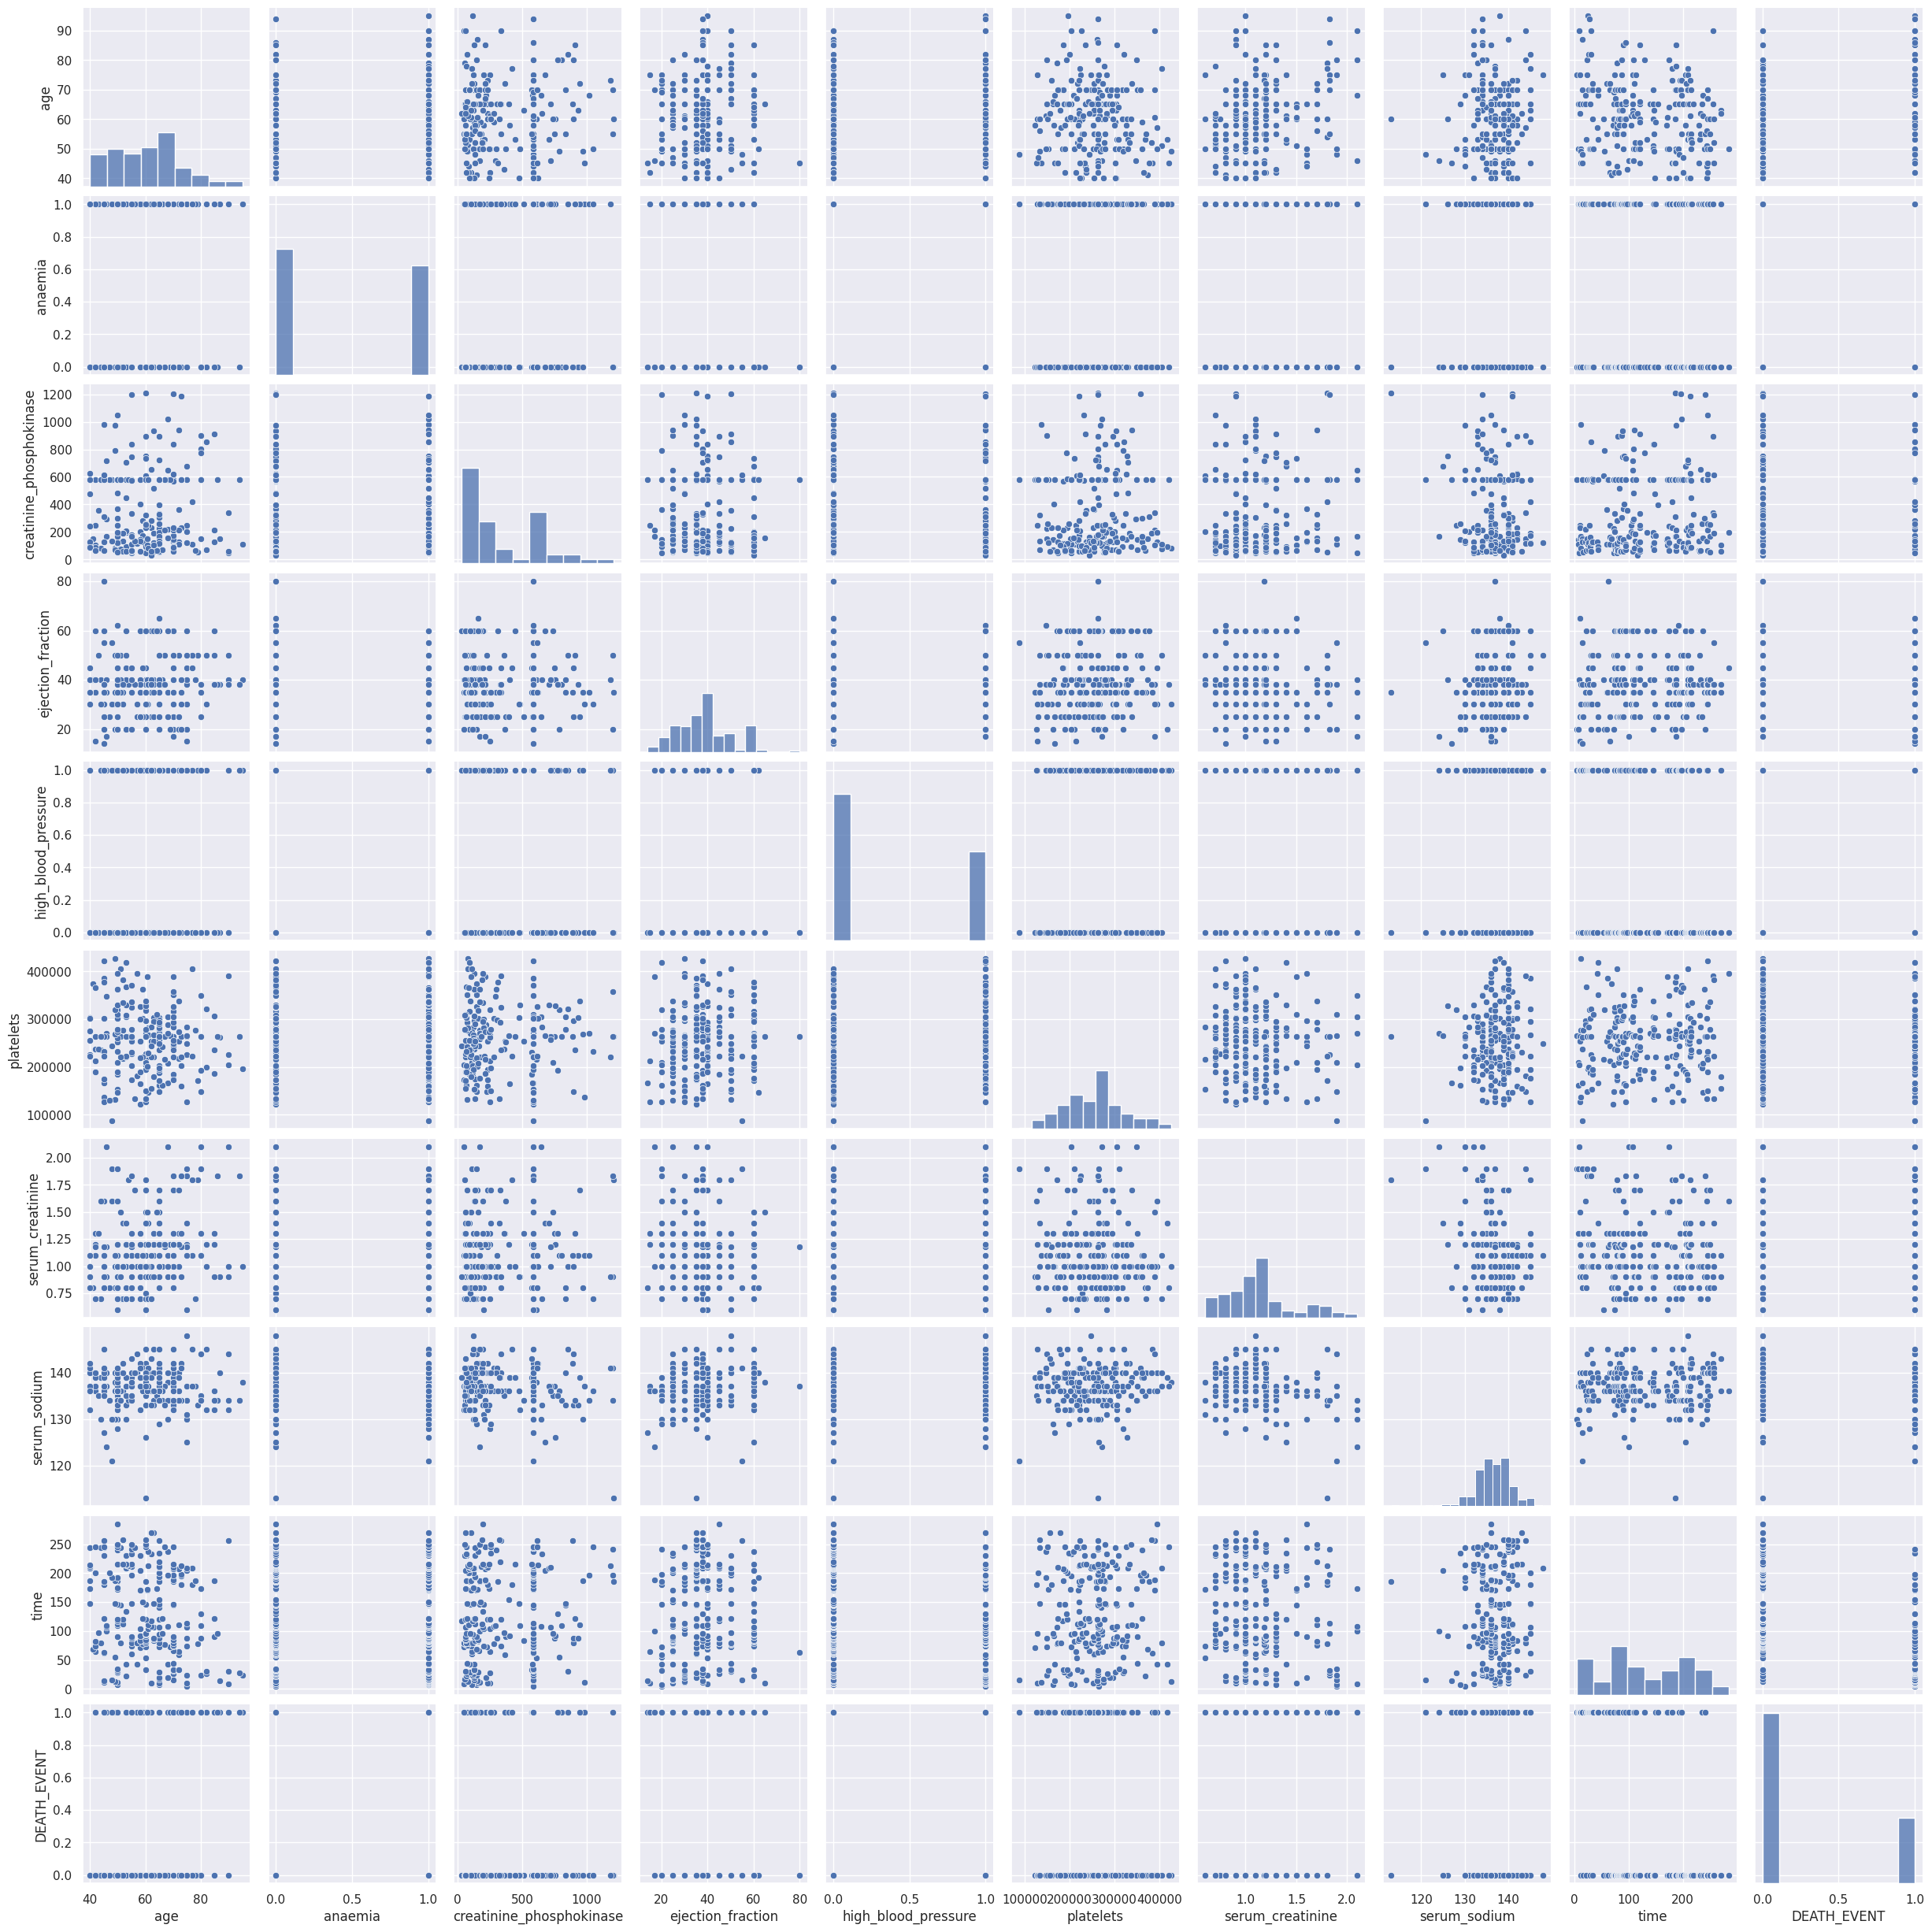

In [ ]:
sns.pairplot(df)

### Predictor Significance using permitation importance correaltion metrix and feature importance

In [ ]:
!pip install eli5


### F1 Score


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

dt = DecisionTreeClassifier(random_state=42)

# First we make dummy data from original data
dummy_data_v2 = pd.get_dummies(df, columns=['platelets', 'serum_creatinine'])


# Make Testing and Training Data
X = dummy_data_v2.drop(['DEATH_EVENT'], axis=1)
y = dummy_data_v2['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    stratify=y,
                                                    random_state=42)
# Make copy of this Test Data
X_train_v1, X_test_v1, y_train_v1, y_test_v1 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

f1_score_list = []

for k in range(1, 20):
    selector = SelectKBest(chi2, k=k)
    selector.fit(X_train_v1, y_train_v1)

    sel_X_train_v1 = selector.transform(X_train_v1)
    sel_X_test_v1 = selector.transform(X_test_v1)

    dt.fit(sel_X_train_v1, y_train_v1)
    kbest_preds = dt.predict(sel_X_test_v1)
    f1_score_kbest = round(f1_score(y_test, kbest_preds, average='weighted'), 3)
    f1_score_list.append(f1_score_kbest)

print(f1_score_list)

[0.777, 0.758, 0.728, 0.769, 0.815, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835]


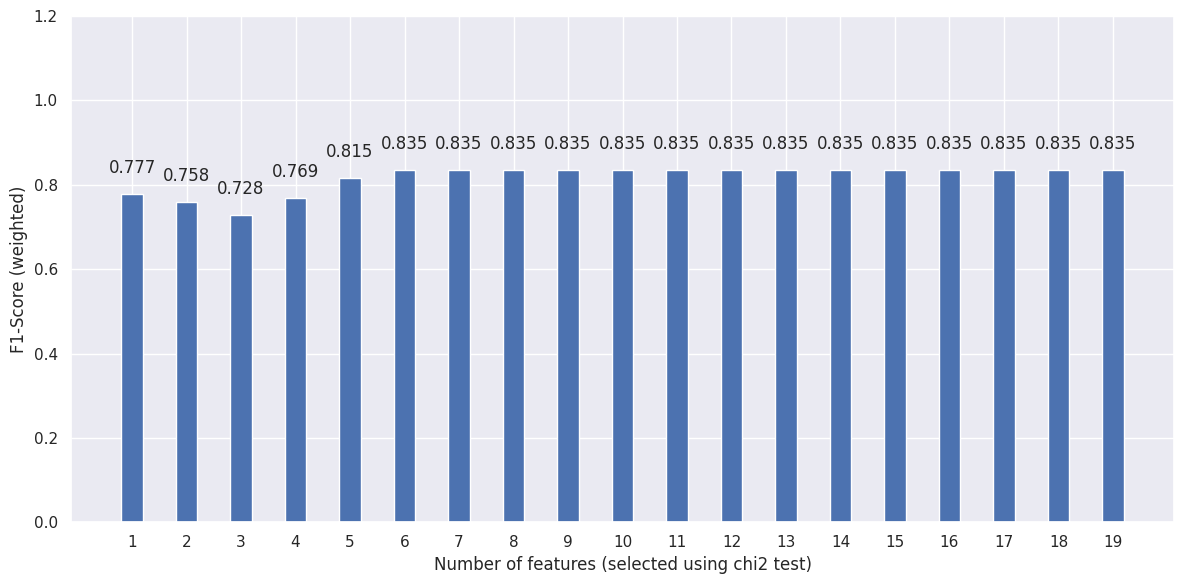

In [ ]:
# We can now plot the F1-score for each number of variables used in the model:
fig, ax = plt.subplots(figsize=(12, 6))
x = ['1','2','3','4','5','6','7','8','9','10','11','12','13', '14', '15', '16', '17', '18', '19']
y = f1_score_list
ax.bar(x, y, width=0.4)
ax.set_xlabel('Number of features (selected using chi2 test)')
ax.set_ylabel('F1-Score (weighted)')
ax.set_ylim(0, 1.2)
for index, value in enumerate(y):
    plt.text(x=index, y=value + 0.05, s=str(value), ha='center')

plt.tight_layout()

In [ ]:
X_new = dummy_data_v2.drop(['DEATH_EVENT'], axis=1)
Y_new = dummy_data_v2['DEATH_EVENT']

# Create and fit selector
selector = SelectKBest(f_classif, k=4)
selector.fit(X_new, Y_new)

# Now selector will take the best featured columns
cols = selector.get_support(indices=True)
new_feature_data = X_new.iloc[:,cols]
print(new_feature_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 0 to 298
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    228 non-null    float64
 1   ejection_fraction      228 non-null    int64  
 2   time                   228 non-null    int64  
 3   serum_creatinine_1.83  228 non-null    uint8  
dtypes: float64(1), int64(2), uint8(1)
memory usage: 7.3 KB
None


In [ ]:
new_feature_data['DEATH_EVENT'] = Y_new
new_feature_data.head()

,age,ejection_fraction,time,serum_creatinine_1.83,DEATH_EVENT
0,75.0,20,4,0,1
2,65.0,20,7,0,1
3,50.0,20,7,0,1
5,90.0,40,8,0,1
6,75.0,15,10,0,1


### Model Building and training and testing


In [ ]:
# Splitting Data into Training and Test Sets

from sklearn.model_selection import train_test_split


X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
common_data_points = set(X_train.index) & set(X_test.index)
print("Common Data Points between Training and Test Sets:", len(common_data_points))

Common Data Points between Training and Test Sets: 0


### Training using 3 model - Logistic regression, Random forest and Gradient Boost

In [ ]:


#  Logistic Regression
# ---------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

# Coefficients interpretation
coefficients = lr.coef_[0]
feature_importance_lr = pd.DataFrame(coefficients, index=X_train.columns, columns=['Coefficient'])
feature_importance_lr['Absolute Coefficient'] = feature_importance_lr['Coefficient'].abs()
feature_importance_lr = feature_importance_lr.sort_values(by='Absolute Coefficient', ascending=False)

# Predict and calculate accuracy
y_pred_lr = lr.predict(X_test_scaled)
acc_lr = accuracy_score(y_test, y_pred_lr)

# Print feature importance for Logistic Regression
print('Feature importance through coefficients using logistic regression')
print(feature_importance_lr)

# Print accuracy of Logistic Regression
print(f'Accuracy of Logistic Regression: {acc_lr:.2f}')






Feature importance through coefficients using logistic regression
                          Coefficient  Absolute Coefficient
time                        -1.610017              1.610017
ejection_fraction           -0.655296              0.655296
age                          0.505969              0.505969
serum_creatinine             0.311430              0.311430
high_blood_pressure         -0.221664              0.221664
creatinine_phosphokinase     0.207125              0.207125
serum_sodium                -0.168637              0.168637
anaemia                      0.147351              0.147351
platelets                   -0.007076              0.007076
Accuracy of Logistic Regression: 0.86


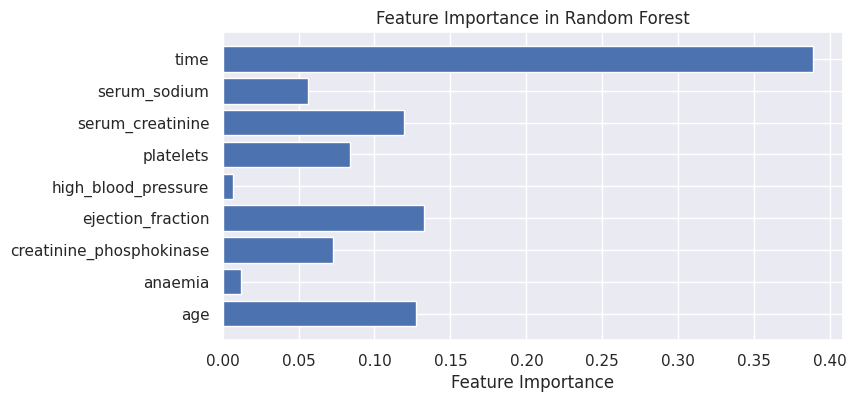

Accuracy of Random Forest: 0.81


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

# Feature importance for Random Forest
rf_feature_importance = rf.feature_importances_
plt.barh(X.columns, rf_feature_importance)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest')
plt.show()

print(f'Accuracy of Random Forest: {acc_rf:.2f}')



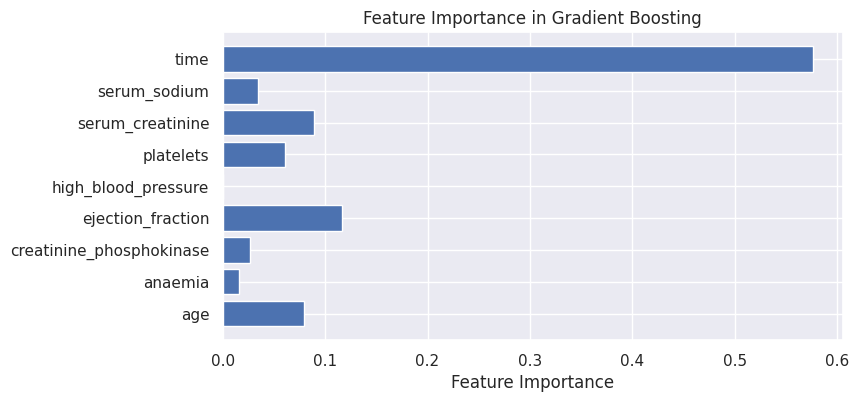

Accuracy of Gradient Boosting: 0.77


In [ ]:
from sklearn.ensemble import  GradientBoostingClassifier

# Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
acc_gb = accuracy_score(y_test, y_pred_gb)

# Feature importance for Gradient Boosting
gb_feature_importance = gb.feature_importances_
plt.barh(X.columns, gb_feature_importance)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Gradient Boosting')
plt.show()

print(f'Accuracy of Gradient Boosting: {acc_gb:.2f}')

### Training and Testing the Dataset with outliers using the same 3 models

In [ ]:
# Splitting Data into Training and Test Sets

from sklearn.model_selection import train_test_split


X = df_with_outliers.drop('DEATH_EVENT', axis=1)
y = df_with_outliers['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:


#  Logistic Regression
# ---------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

# Coefficients interpretation
coefficients = lr.coef_[0]
feature_importance_lr = pd.DataFrame(coefficients, index=X_train.columns, columns=['Coefficient'])
feature_importance_lr['Absolute Coefficient'] = feature_importance_lr['Coefficient'].abs()
feature_importance_lr = feature_importance_lr.sort_values(by='Absolute Coefficient', ascending=False)

# Predict and calculate accuracy
y_pred_lr = lr.predict(X_test_scaled)
acc_lr = accuracy_score(y_test, y_pred_lr)

# Print feature importance for Logistic Regression
print('Feature importance through coefficients using logistic regression')
print(feature_importance_lr)

# Print accuracy of Logistic Regression
print(f'Accuracy of Logistic Regression: {acc_lr:.2f}')






Feature importance through coefficients using logistic regression
                          Coefficient  Absolute Coefficient
time                        -1.691787              1.691787
ejection_fraction           -0.849566              0.849566
serum_creatinine             0.784320              0.784320
age                          0.666943              0.666943
sex                         -0.491353              0.491353
serum_sodium                -0.255385              0.255385
platelets                   -0.178841              0.178841
smoking                      0.175349              0.175349
anaemia                     -0.158562              0.158562
high_blood_pressure         -0.101217              0.101217
creatinine_phosphokinase     0.071045              0.071045
diabetes                     0.061125              0.061125
Accuracy of Logistic Regression: 0.79


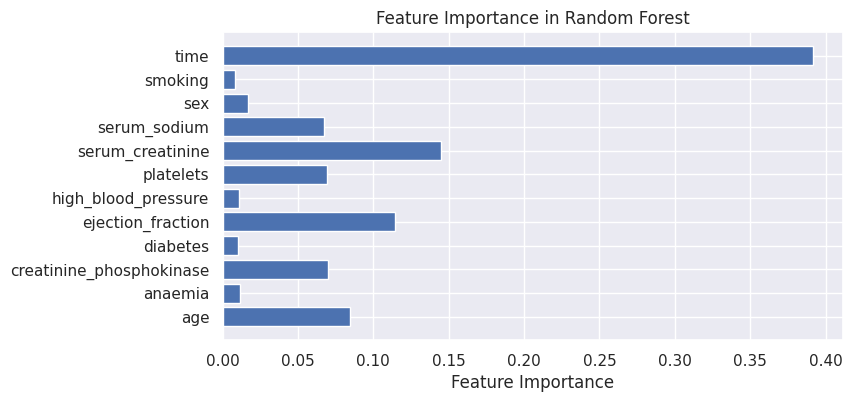

Accuracy of Random Forest: 0.77


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

# Feature importance for Random Forest
rf_feature_importance = rf.feature_importances_
plt.barh(X.columns, rf_feature_importance)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest')
plt.show()

print(f'Accuracy of Random Forest: {acc_rf:.2f}')



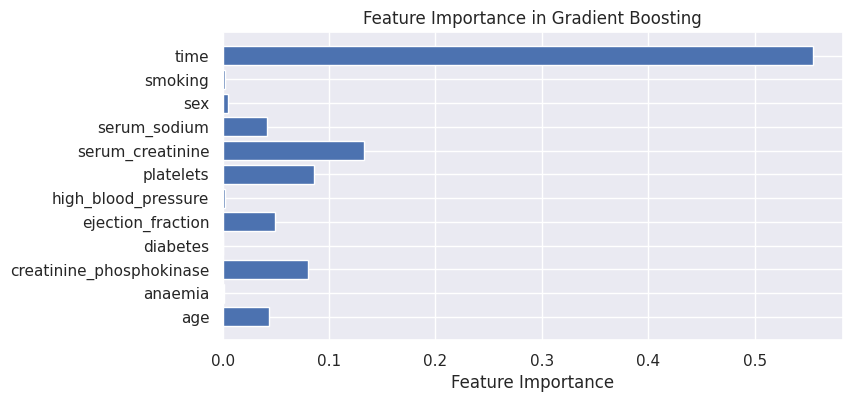

Accuracy of Gradient Boosting: 0.70


In [ ]:
from sklearn.ensemble import  GradientBoostingClassifier

# Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
acc_gb = accuracy_score(y_test, y_pred_gb)

# Feature importance for Gradient Boosting
gb_feature_importance = gb.feature_importances_
plt.barh(X.columns, gb_feature_importance)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Gradient Boosting')
plt.show()

print(f'Accuracy of Gradient Boosting: {acc_gb:.2f}')

In [ ]:
from sklearn.svm import SVC
model=SVC(kernel="rbf")
model.fit(X_train,y_train)
sv=model.predict(X_test)
from sklearn import metrics
print(metrics.classification_report(y_test,sv))

              precision    recall  f1-score   support

           0       0.59      1.00      0.74        53
           1       0.00      0.00      0.00        37

    accuracy                           0.59        90
   macro avg       0.29      0.50      0.37        90
weighted avg       0.35      0.59      0.44        90




### Accuracy Comparsion with and Without outliers**

In [ ]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [ ]:
numeric_cols = df.astype('int64').columns

In [ ]:
# 3. Effect of Removing Outliers
# Using IQR to identify and remove outliers
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) |(df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
# Compare models with and without outliers

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def model_performance(dataframe):
    X = dataframe.drop('DEATH_EVENT', axis=1)
    y = dataframe['DEATH_EVENT']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

accuracy_with_outliers = model_performance(df_with_outliers)
accuracy_without_outliers = model_performance(df)
print("Accuracy with Outliers:", accuracy_with_outliers)
print("Accuracy without Outliers:", accuracy_without_outliers)

Accuracy with Outliers: 0.75
Accuracy without Outliers: 0.782608695652174


###  **Making Prediction**

Mean squared Error:- measures the amount of error in statistical model. It calculates the average squared difference between the observed and predicted values. The reason it is squared is so the magnitudes don't cancel out each other.

The coefficient of determination:- shows how correlated one dependent and one independent variable are.

R2 score is used to evaluate the performance of a linear regression model. The value will usually range between 0 and 1. Value of < 0.3 is weak.

In [ ]:
from sklearn.metrics import r2_score


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X_train and y_train are your training data
# Create a linear regression model
regr = LinearRegression()

# Train the model
regr.fit(X_train, y_train)

# Make predictions using the training set
y_pred = regr.predict(X_train)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_train, y_pred))


Mean squared error: 0.11
Coefficient of determination: 0.46


In [ ]:
# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_train, y_pred))
r2 = r2_score(y_train, y_pred)
print("R^2 score on tarining set =", r2)

Mean squared error: 0.11
Coefficient of determination: 0.46
R^2 score on tarining set = 0.455621486184285


In [ ]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("R^2 score on test set =", r2)

Mean squared error: 0.18
Coefficient of determination: 0.26
R^2 score on test set = 0.2553352708018828


In [ ]:
# Understanding the important features
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(regr, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X_test.columns.tolist())

Weight,Feature
0.3359 ± 0.2100,time
0.1399 ± 0.0614,ejection_fraction
0.0198 ± 0.0685,age
0.0153 ± 0.0869,serum_creatinine
0.0118 ± 0.0376,sex
0.0048 ± 0.0104,platelets
0.0035 ± 0.0082,serum_sodium
0.0006 ± 0.0024,diabetes
0.0004 ± 0.0005,creatinine_phosphokinase
-0.0046 ± 0.0263,anaemia


We are using above code snippet to check the quartile range and any outlier if occur in alreacy present dataset.

**Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.**

In [ ]:
from sklearn.metrics import mean_squared_error

# ... [previous code for training the models]

# Logistic Regression Predictions and MSE
y_pred_lr_prob = lr.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for the positive class
mse_lr = mean_squared_error(y_test, y_pred_lr_prob)

# Random Forest Predictions and MSE
y_pred_rf_prob = rf.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
mse_rf = mean_squared_error(y_test, y_pred_rf_prob)

# Gradient Boosting Predictions and MSE
y_pred_gb_prob = gb.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
mse_gb = mean_squared_error(y_test, y_pred_gb_prob)

# Print accuracies and MSE for each model
print(f'Logistic Regression - Accuracy: {acc_lr:.2f}, MSE: {mse_lr}')
print(f'Random Forest - Accuracy: {acc_rf:.2f}, MSE: {mse_rf}')
print(f'Gradient Boosting - Accuracy: {acc_gb:.2f}, MSE: {mse_gb}')


Logistic Regression - Accuracy: 0.79, MSE: 0.1715353642383817
Random Forest - Accuracy: 0.77, MSE: 0.15747333333333335
Gradient Boosting - Accuracy: 0.70, MSE: 0.22418262474694678


In [ ]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Make a copy of the original data
original_data = df.copy()

# Function to introduce missing values and impute them using different methods
def evaluate_imputation(data, missing_percentage):
    # Seed for reproducibility
    np.random.seed(42)

    # Randomly select indices to set as missing values
    total_entries = data.shape[0] * data.shape[1]
    num_missing_entries = int(missing_percentage * total_entries)
    missing_indices = np.random.choice(total_entries, size=num_missing_entries, replace=False)

    # Create a mask to mark missing values
    missing_mask = np.full(data.size, False)
    missing_mask[missing_indices] = True
    missing_mask = missing_mask.reshape(data.shape)

    # Introduce missing values in the dataset
    data_with_missing = data.mask(missing_mask)

    # Impute missing values using different methods
    # Method 1: Mean imputation
    imputer_mean = SimpleImputer(strategy='mean')
    data_imputed_mean = imputer_mean.fit_transform(data_with_missing)

    # Convert the imputed data back to a DataFrame
    data_imputed_mean = pd.DataFrame(data_imputed_mean, columns=data.columns)

    # Method 2: Median imputation
    imputer_median = SimpleImputer(strategy='median')
    data_imputed_median = imputer_median.fit_transform(data_with_missing)

    # Convert the imputed data back to a DataFrame
    data_imputed_median = pd.DataFrame(data_imputed_median, columns=data.columns)

    # Method 3: k-NN imputation
    imputer_knn = KNNImputer(n_neighbors=5)
    data_imputed_knn = imputer_knn.fit_transform(data_with_missing)

    # Convert the imputed data back to a DataFrame
    data_imputed_knn = pd.DataFrame(data_imputed_knn, columns=data.columns)

    # Split the dataset into features and target variable
    X_mean = data_imputed_mean.drop(columns=['DEATH_EVENT'])
    y_mean = data_imputed_mean['DEATH_EVENT']

    X_median = data_imputed_median.drop(columns=['DEATH_EVENT'])
    y_median = data_imputed_median['DEATH_EVENT']

    X_knn = data_imputed_knn.drop(columns=['DEATH_EVENT'])
    y_knn = data_imputed_knn['DEATH_EVENT']

    # Split the dataset into training and testing sets
    X_train_mean, X_test_mean, y_train_mean, y_test_mean = train_test_split(X_mean, y_mean, test_size=0.2, random_state=42)
    X_train_median, X_test_median, y_train_median, y_test_median = train_test_split(X_median, y_median, test_size=0.2, random_state=42)
    X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.2, random_state=42)

    # Fit a model for bias and variance calculation
    model = RandomForestRegressor()
    model.fit(X_train_mean, y_train_mean)

    # Calculate bias and variance
    y_pred_mean = model.predict(X_test_mean)
    bias_mean = np.mean((y_test_mean - np.mean(y_pred_mean))**2)
    variance_mean = np.var(y_pred_mean)

    # Repeat for median imputation
    model.fit(X_train_median, y_train_median)
    y_pred_median = model.predict(X_test_median)
    bias_median = np.mean((y_test_median - np.mean(y_pred_median))**2)
    variance_median = np.var(y_pred_median)

    # Repeat for k-NN imputation
    model.fit(X_train_knn, y_train_knn)
    y_pred_knn = model.predict(X_test_knn)
    bias_knn = np.mean((y_test_knn - np.mean(y_pred_knn))**2)
    variance_knn = np.var(y_pred_knn)

    # Evaluate the performance of imputation methods using RMSE
    mse_mean = mean_squared_error(original_data, data_imputed_mean, squared=False)
    mse_median = mean_squared_error(original_data, data_imputed_median, squared=False)
    mse_knn = mean_squared_error(original_data, data_imputed_knn, squared=False)

    return mse_mean, mse_median, mse_knn, bias_mean, variance_mean, bias_median, variance_median, bias_knn, variance_knn

# Evaluate imputation performance for different missing percentages
missing_percentages = [0.01, 0.05, 0.1]

for missing_percentage in missing_percentages:
    mse_mean, mse_median, mse_knn, bias_mean, variance_mean, bias_median, variance_median, bias_knn, variance_knn = evaluate_imputation(original_data, missing_percentage)

    print(f"\nMissing Percentage: {missing_percentage * 100}%")
    print(f"Mean Imputation RMSE: {mse_mean}")
    print(f"Mean Imputation Bias: {bias_mean}")
    print(f"Mean Imputation Variance: {variance_mean}")
    print(f"Median Imputation RMSE: {mse_median}")
    print(f"Median Imputation Bias: {bias_median}")
    print(f"Median Imputation Variance: {variance_median}")
    print(f"k-NN Imputation RMSE: {mse_knn}")
    print(f"k-NN Imputation Bias: {bias_knn}")
    print(f"k-NN Imputation Variance: {variance_knn}")


Missing Percentage: 1.0%
Mean Imputation RMSE: 313.799121665586
Mean Imputation Bias: 0.20335985251371086
Mean Imputation Variance: 0.10702331357931341
Median Imputation RMSE: 262.06216750988335
Median Imputation Bias: 0.2040907844990549
Median Imputation Variance: 0.10638946124763705
k-NN Imputation RMSE: 222.03056071678103
k-NN Imputation Bias: 0.20366465217391302
k-NN Imputation Variance: 0.10308543100189033

Missing Percentage: 5.0%
Mean Imputation RMSE: 959.983328973263
Mean Imputation Bias: 0.18648699217560716
Mean Imputation Variance: 0.0920759198183382
Median Imputation RMSE: 939.9780689387329
Median Imputation Bias: 0.19283194706994336
Median Imputation Variance: 0.09382930056710774
k-NN Imputation RMSE: 938.2581792089292
k-NN Imputation Bias: 0.19021403591682412
k-NN Imputation Variance: 0.09116534026465029

Missing Percentage: 10.0%
Mean Imputation RMSE: 1267.8188572198003
Mean Imputation Bias: 0.18504573586159226
Mean Imputation Variance: 0.07847514444194376
Median Imputat

## Confusion Matrix

In [94]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(
    n_estimators=50,  # Number of weak learners (decision trees)
    random_state=42,
)
ada_model.fit(X_train, y_train)

ada_pred =ada_model.predict(X_test)

# print("Classification Report")
# print(classification_report(y_test,ada_pred))


print("Confusion matrix")
print(confusion_matrix(y_test,ada_pred))

Confusion matrix
[[47  6]
 [20 17]]


### **Answers**


**Q1 Data Types:**

Numeric: [age creatinine_phosphokinase ejection_fraction platelets serum_creatinine serum_sodium time']

Categorical: [anaemia diabetes high_blood_pressure sex smoking DEATH_EVENT]

**Q2 Missing Values:**

There are no missing values in the dataset.

**Q3 Distributions of Numeric Variables:**

Displayed the distribution of numeric variable 'age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','time'. most of the distribution are normal and boxplots are made to detect the outliers and handled appropriately right after

**Q4 Useful Independent Variables for Predicting 'DEATH_EVENT':**

Based on correlation Matrix, Feature Importance, and Permutatuion Imporatance the top variables are 'time', 'serum_creatinine', 'ejection_fraction', 'age', and 'platelets'.

**Q5 Independent Variables with Missing Data:**

There are no independent variables with missing data.

**Q6 Training and Test Sets Comparison:**

The training and test sets are not exactly the same since they are split from the dataset and there are no common datapoints as shown.

**Q7 Independence of Predictor Variables:**

The correlation matrix shows the relationships among variables. Some variables have moderate correlations. smoking and sex where highly correlated so removed the sex column from the dataset

**Q8 Most Important Predictor Variables:**

Based on correlation Matrix, Feature Importance, and Permutatuion Imporatance, the most important variables are 'time', 'serum_creatinine', and 'ejection_fraction'

**Q9 Ranges of Predictor Variables:**

Yes, it make sense
Age: 40 to 95 years Anaemia: 0 to 1 Creatinine Phosphokinase: 23 to 7861 mcg/L Diabetes: 0 to 1 Ejection Fraction: 14% to 80% High Blood Pressure: 0 to 1 Platelets: 25100 to 850000 kiloplatelets/mL Serum Creatinine: 0.5 to 9.4 mg/dL Serum Sodium: 113 to 148 mEq/L Sex: 0 to 1 Smoking: 0 to 1 Time: 4 to 285 days DEATH_EVENT: 0 to 1


**Q10 What are the distributions of the predictor variables?**

We get normal distribution for most of the predictor variables in form of bell curve. in other cases outlier have been removed and normalised


**Q11 Remove outliers and keep outliers (does if have an effect of the final predictive model)?**

the accuracy is more when the outlier were removed compare to the case when the outlier where present in all the 3 models

 **Q12 Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.**

Has been calculated and displayed where mean,median and knn methods are used for imputation

## References

1) https://towardsdatascience.com/interpreting-coefficients-in-linear-and-logistic-regression-6ddf1295f6f1

2)https://towardsdatascience.com/decision-trees-explained-3ec41632ceb6

3)https://www.analyticsvidhya.com/blog/2020/05/decision-tree-vs-random-forest-algorithm/

4)https://www.analyticsvidhya.com/blog/2020/10/all-about-decision-tree-from-scratch-with-python-implementation/


5)https://www.kdnuggets.com/2020/04/visualizing-decision-trees-python.html

6)https://www.datacamp.com/community/tutorials/xgboost-in-python

7)https://github.com/MayurAvinash/DESM_INFO6105/blob/main/Model_Interpretability_Assignment.ipynb

### **Conclusion**

The analysis revealed that certain variables like 'time', 'serum_creatinine', 'ejection_fraction', and 'age' are significant predictors of heart failure mortality. Logistic regression proved effective in feature selection and modeling. The findings underscore the importance of these clinical indicators in predicting patient outcomes in heart failure cases. This study demonstrates the potential of machine learning techniques in enhancing predictive accuracy in medical datasets.

## License

MIT License
Copyright (c) 2024 Jay Parekh Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:
The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.